In [9]:
import random
def randomDeletePointDA(data, label, length):
	"""data, label长度在dataAug中判断, """
	dataLen = len(data)
	print(dataLen)
	indices = list(range(dataLen))
	print(f'indices {len(indices)}')
	random.shuffle(indices)
	remove_indices = indices[:dataLen-length]
	new_data = [data[i] for i in range(dataLen) if i not in remove_indices]
	new_label = [label[i] for i in range(dataLen) if i not in remove_indices]
	return new_data, new_label


99
indices 99
total drink 57.15000000000002


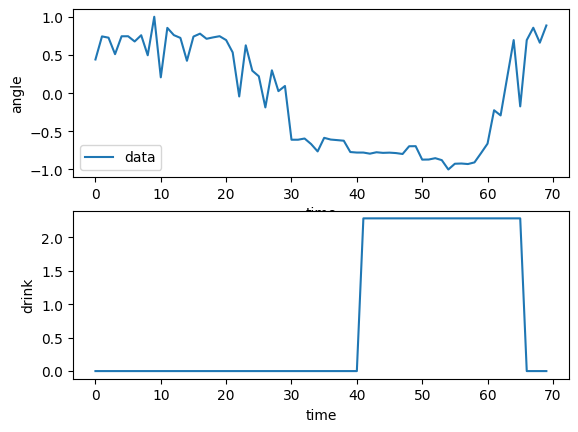

data [[0.44051024]
 [0.74287884]
 [0.72601807]
 [0.51015677]
 [0.74437657]
 [0.74475209]
 [0.67636658]
 [0.75803584]
 [0.49552726]
 [1.        ]]
79
indices 79
total drink 88.45800000000006


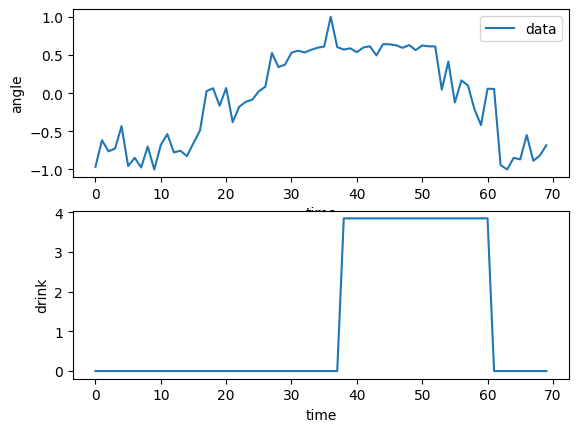

data [[-0.96436225]
 [-0.61673832]
 [-0.76206573]
 [-0.72568957]
 [-0.43213398]
 [-0.95496663]
 [-0.84721237]
 [-0.97308164]
 [-0.69931997]
 [-1.        ]]
92
indices 92
total drink 70.224


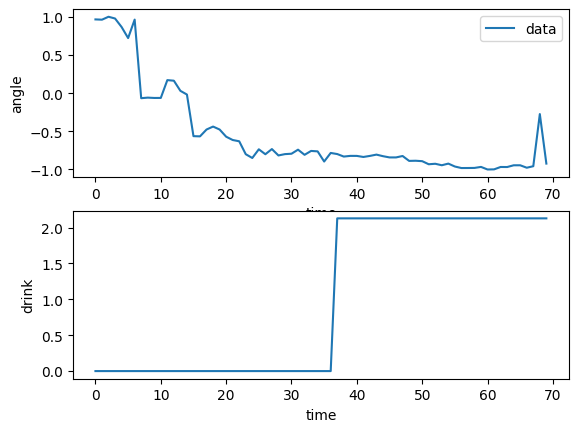

data [[ 0.96520796]
 [ 0.96182802]
 [ 1.        ]
 [ 0.97697737]
 [ 0.86590491]
 [ 0.7208838 ]
 [ 0.96280325]
 [-0.0662788 ]
 [-0.05905197]
 [-0.06328483]]


In [13]:
# %matplotlib inline
# %run setMysqlData.py
from setMysqlData import connectDatabase, getAllData, visual, visual2, featExtra
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
# normalized_matrix = scaler.fit_transform(matrix)
mydb = connectDatabase("smartBottle")
result = getAllData(mydb)
for line in result:
    # visual(line[2], line[3], line[4])
    y = [float(num) for num in line[2].split(',')]
    z = [float(num) for num in line[3].split(',')]
    label = [float(num) for num in line[4].split(',')]
    data = np.array([y, z])
    # print(f'162 data {data.shape}')
    data = featExtra(data.T)
    new_data, new_label = randomDeletePointDA(data, label, 70)
    new_data = np.array(new_data)
    # visual2(new_data, new_label)
    data = scaler.fit_transform(new_data.reshape(-1, 1))
    visual2(data.flatten(), new_label)
    # print(f'162 data {data.shape}')
    print(f'data {data[:10]}')


In [1]:
"""
    LSTM 先利用PCA来降维数据到1维 这样就不用在网络里修改了（引入先验知识）
    SVM 对输入信息分类成60-80, 80-100这样
"""


''

In [3]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=1)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.99244289]
[6.30061232]


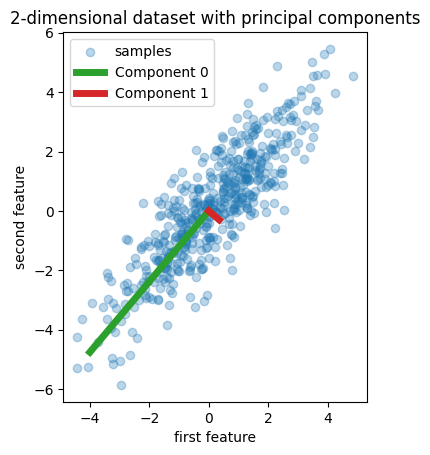

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=2).fit(X)


plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

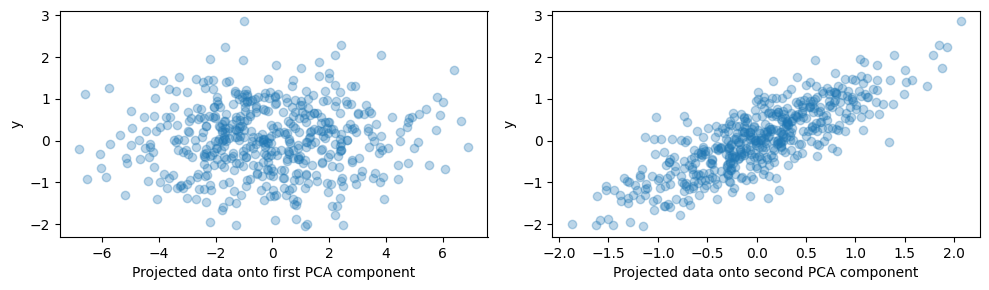

In [6]:
y = X.dot(pca.components_[1]) + rng.normal(size=n_samples) / 2

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].scatter(X.dot(pca.components_[0]), y, alpha=0.3)
axes[0].set(xlabel="Projected data onto first PCA component", ylabel="y")
axes[1].scatter(X.dot(pca.components_[1]), y, alpha=0.3)
axes[1].set(xlabel="Projected data onto second PCA component", ylabel="y")
plt.tight_layout()
plt.show()

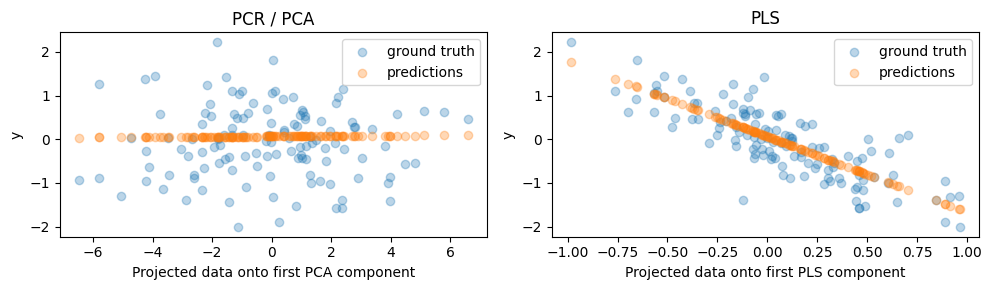

In [7]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

In [11]:
import numpy as np
from sklearn.decomposition import PCA
import random

# 创建PCA对象
pca = PCA(n_components=1)

# 三个包含100个数的列表
list1 = [random.randint(0, 10) for i in range(10)]  # 第一个列表
list2 = [random.randint(0, 10) for i in range(10)]  # 第二个列表
list3 = [random.randint(0, 10) for i in range(10)]  # 第三个列表

# 将三个列表组合成一个二维数组
data = np.array([list1, list2, list3])

# 对数据进行降维
result = pca.fit_transform(data.T)

# 将降维后的结果转换为一维数组
result = result.flatten()

# 打印降维后的结果
print(result)


[ 2.63204845 -0.25321466 -1.57099752 -3.36233945 -4.35336631  2.59222536
  1.92375268  4.64983961 -4.2298114   1.97186323]


In [ ]:
import os
import glob


folder_path = "./temp"

# 获取文件夹中的所有文件
files_ = glob.glob(os.path.join(folder_path, "*"))
for file in files_:
    print(file)